# Classification forecast of kyphosis (individuals wth curved backbones)
target (column 0) - predict whether the person has kyphosis or not

features (column 1 to 3) - the other three parameters for prediction

For the age in column 1, the unit being used is in monthly

In [2]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Read dataset from GitHub
! git clone https://github.com/PrefaceCoding/M3L5

fatal: destination path 'M3L5' already exists and is not an empty directory.


In [4]:
# Read the first five rows of the csv data file
df = pd.read_csv("M3L5/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
# Look at the quick statitic summary of the data to see if there are anomalies
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


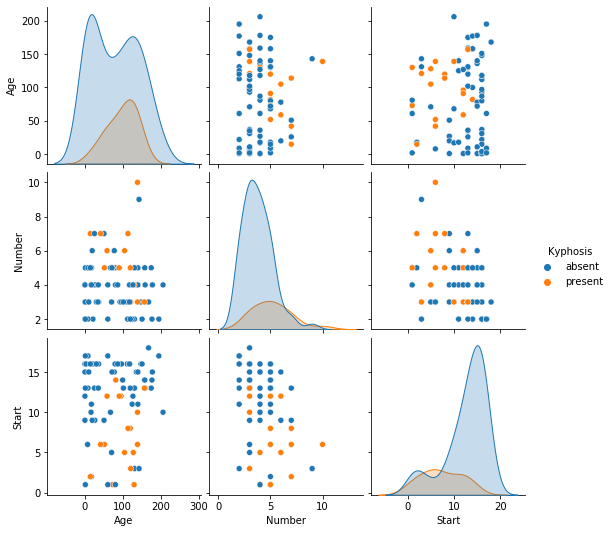

In [6]:
# Plot pairwise relationships in the dataset
# each variable in the data are shared by the same y-axis across a row and x-axis across a column
sns.pairplot(df, hue = 'Kyphosis')

In [7]:
# Change the monthly age to yearly
df["Age"]/=12
df.head()

,Kyphosis,Age,Number,Start
0,absent,5.916667,3,5
1,absent,13.166667,3,14
2,present,10.666667,4,5
3,absent,0.166667,5,1
4,absent,0.083333,4,15


In [8]:
# Get the features and the target
X = df.drop("Kyphosis", axis = 1)
y = df["Kyphosis"]

In [9]:
# step 1: data preparation 
# spliting into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

X_train.head()

,Age,Number,Start
74,0.916667,3,15
54,11.666667,4,15
1,13.166667,3,14
71,10.583333,4,12
45,11.583333,3,10


In [10]:
# step 2: model selction 
from sklearn.tree import DecisionTreeClassifier

# instantiate
dtree = DecisionTreeClassifier(criterion='gini')
dtree

DecisionTreeClassifier()

In [11]:
# step 3: model training
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# step 4: model prediction
y_test_pred = dtree.predict(X_test)
y_train_pred = dtree.predict(X_train)

y_test_pred == y_test

33     True
61     True
21     True
32     True
20     True
13     True
52    False
25    False
22    False
27     True
30     True
2     False
67    False
16     True
69    False
6      True
53     True
14     True
48    False
46     True
26     True
50    False
3     False
37    False
79    False
Name: Kyphosis, dtype: bool

In [13]:
# step 5: evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### show the confusion matrix
#                                      actual value (absent/present)
# predicted value [[count of true negatives TN, count of false positives FP]
# (absent/present) [count of false negatives FN, count of true positives TP]]
confusion_matrix(y_test, y_test_pred)

array([[12,  5],
       [ 6,  2]], dtype=int64)

In [14]:
# Show the distribution of the testing data
y_test.value_counts(normalize=True)

absent     0.68
present    0.32
Name: Kyphosis, dtype: float64

In [15]:
# Show a classfication report for the test data result
# In this example, absent is the positive and presence is the negative
print(classification_report(y_test,y_test_pred))

# precision - how precise your predictions are (think about prediction as the base) -->  TN/(TN+FN) = 12/(12+6) for absent, TP/(TP+FP) = 2/(2+5) for present
# recall - how complete your predictions are (think about truth as the base) --> TN/(TN+FP) = 12/(12+5) for absent, TP/(TP+FN) = 2/(2+6) for present
# f1 score - harmonic mean of precision and recall --> 2*precision*recall / (precision+recall)
# overfitting - trained model work great in its used data but lack of flexibility when encounter new data

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [16]:
# Show a classfication report for the train data result
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        47
     present       1.00      1.00      1.00         9

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



###  The train data model has 100% accuracy (100 % precison and recall) but the test data model having only 56% accuracy is not well generalizing. 
### The model is clearly overfitting. Overfitting can be reduced through pruning. 

Train score: 1.0
Test score: 0.56

Train confusion matrix


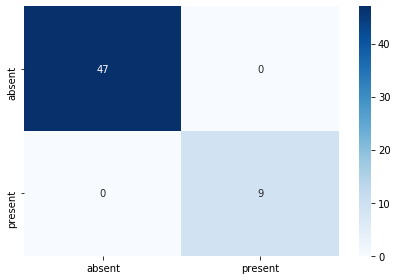


Test confusion matrix


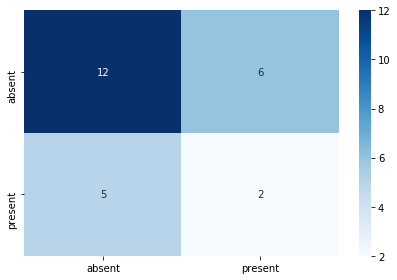

In [17]:
# function to plot a more fansy confusion matrix
classes = ['absent','present']

def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'\n{dom} confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
    
print(f'Train score: {accuracy_score(y_train_pred,y_train)}')
print(f'Test score: {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [18]:
# export the trained model in DOT format (a graph description language) 
# with the decision tree model, features and the target variables as the parameter
from sklearn import tree

# filled is for whether show color for each categorized node
dot_data = tree.export_graphviz(dtree, out_file=None, filled = True, feature_names =['Age','Number','Start'], class_names=['Absent','Present'])

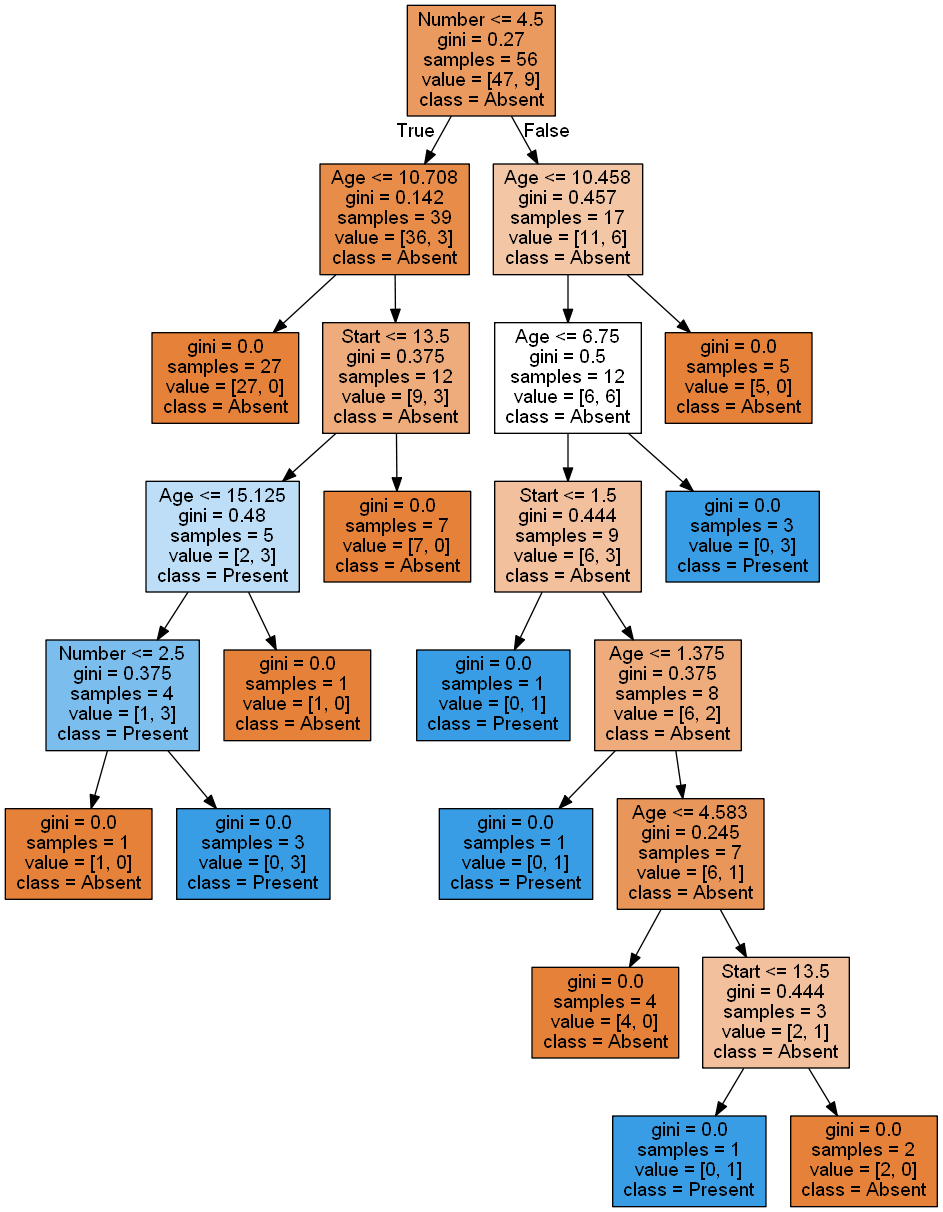

In [19]:
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data) # Show graph

Image(graph.create_png())
# graph.write_png('decision_tree.png');

# Gini = 0 represents all samples got the same results
# Gini = 0.27 means 27% of the samples would go in one direction

# 1. Pre-pruning technique
Pre-pruning technique to reduce the overfitting problem

In [47]:
# Pre pruning techniques - stop the growth of decision tree on an early stage
# limit the growth of trees by setting constrains, like max_depth, min_samples, etc
# Grid search those parameters and choose the optimum values that gives better performace on test data.
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {'max_depth': [3,5,7],
          'min_samples_leaf': [1,2,3],
         'min_samples_split': [2,3,4]
         }

dtree_1 = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=dtree_1,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [49]:
# print out the best parameters
model_1 = gcv.best_estimator_
model_1

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3)

### This time, the train data model has 93% accuracy and the test data model has a improved 68% accuracy

Train score 0.9285714285714286
Test score 0.68

Train confusion matrix


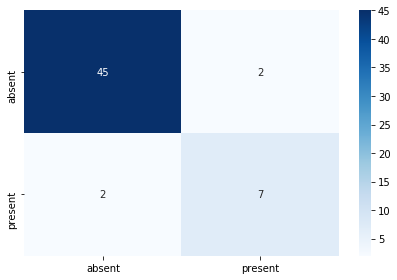


Test confusion matrix


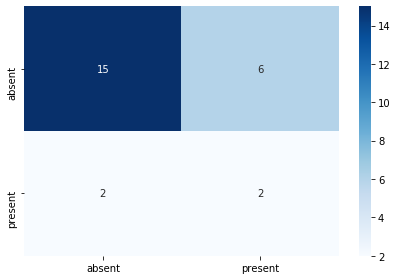

In [50]:
model_1.fit(X_train,y_train)
y_train_pred = model_1.predict(X_train)
y_test_pred = model_1.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

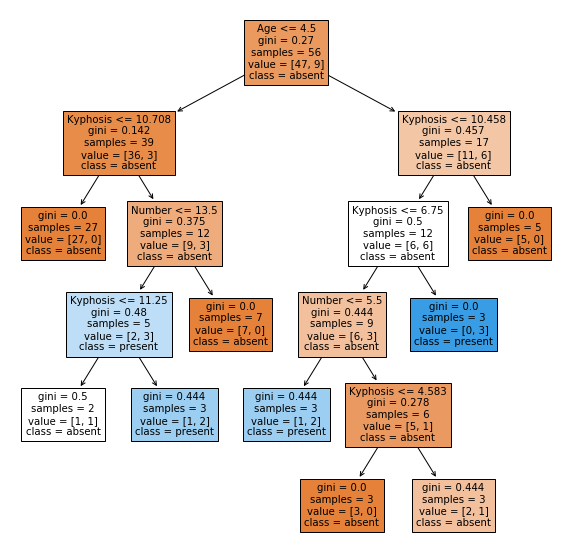

In [51]:
# A better method to plot the decision tree than the above one!!
plt.figure(figsize=(10,10))

features = df.columns
tree.plot_tree(model_1,feature_names=features,class_names=classes,filled=True)
plt.show()
# plt.savefig('decision_tree_prepruning.pdf')

# 2. Post pruning techniques

There are several post pruning techniques. **Cost complexity pruning** is one of the important among them.

Cost complexity pruning is all about finding the **right parameter for alpha**. Different alpha values will be attempted for this tree and will check the accuracy with the pruned trees.
   - Greater values of ccp_alpha increase the number of nodes pruned
   - last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree with only one node, thus should be omited

In [52]:
# cost complexity pruning to find the alpha parameter
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.01530612 0.02040816 0.02142857 0.02802198 0.03314691]
[0.         0.03061224 0.07142857 0.11428571 0.17032967 0.26977041]


In [53]:
# For each ccp_alpha, append the model to a list
dtree_2s = []
for ccp_alpha in ccp_alphas:
    dtree_2 = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    dtree_2.fit(X_train, y_train)
    dtree_2s.append(dtree_2)
    
# Show the number of nodes in the last tree
print(f"Number of nodes in the last tree is: {dtree_2s[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]:0.4f}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0331


Text(0.5, 1.0, 'Total Impurity vs effective alpha for train data model')

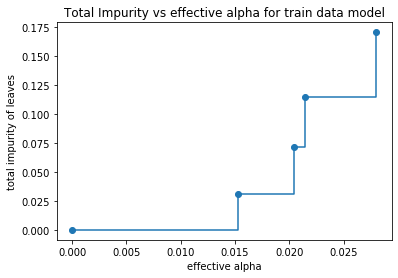

In [54]:
# Plot the relationship between the impurity and ccp_alpha for the train data model
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for train data model")

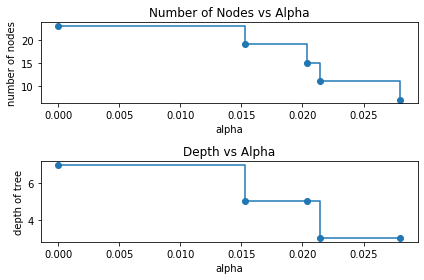

In [55]:
# Plot the relationship between number of nodes and ccp_alpha, and depth and ccp_alpha
# Remove the last alpha in the list
dtree_2s = dtree_2s[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dtree.tree_.node_count for dtree in dtree_2s]
depth = [dtree.tree_.max_depth for dtree in dtree_2s]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of Nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

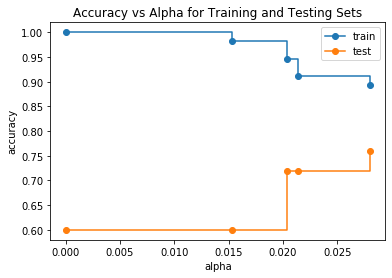

In [56]:
# Plot the relationship between accuracy and ccp_aphla for both train and test data models
# As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better
train_scores = [dtree.score(X_train, y_train) for dtree in dtree_2s]
test_scores = [dtree.score(X_test, y_test) for dtree in dtree_2s]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
### setting ccp_alpha=0.028 maximizes the testing accuracy.

### The model is even less overfiting and the performance on test data model is further improved !!!

### The train data model has 91% accuracy and the test data model has a improved 72% accuracy

Train score 0.9107142857142857
Test score 0.72

Train confusion matrix


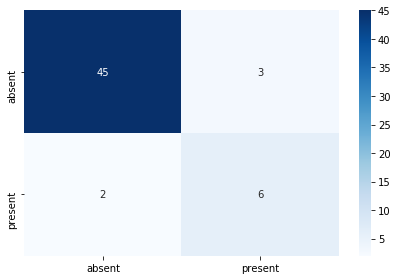


Test confusion matrix


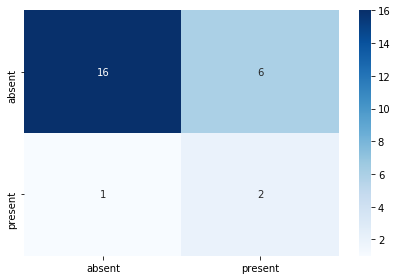

In [57]:
# Choose ccp_alpha = 0.028
dtree_ = tree.DecisionTreeClassifier(ccp_alpha=0.028)
dtree_.fit(X_train,y_train)
y_train_pred = dtree_.predict(X_train)
y_test_pred = dtree_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

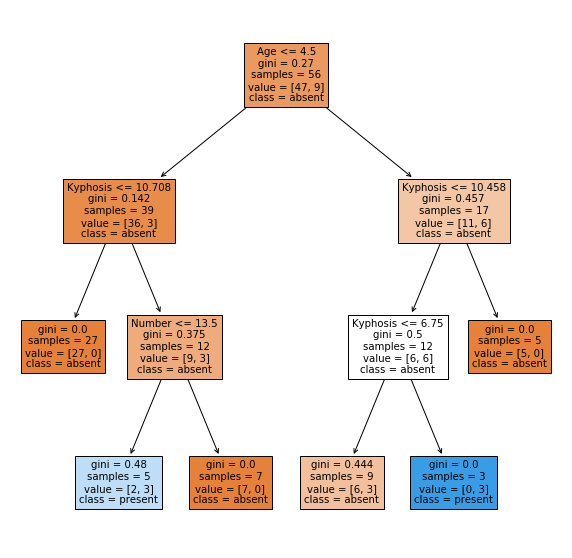

In [59]:
# PLot the tree with respect to the optimized decision tree model
plt.figure(figsize=(10,10))
classes = ['absent','present']
tree.plot_tree(dtree_,feature_names=features,class_names=classes,filled=True)
plt.show()
# plt.savefig('decision_tree_propruning.pdf')